### AGENDA : 다음 분기에 어떤 게임을 설계해야 하는가?
### 현상황 : 게임 시장에 신규진출  
  
## ***달성 목표 : 꾸준히 수익을 낼 수 있는 게임을 설계하자***

### 데이터 확인 및 정리


보유한 데이터를 확인하여  
 - 불필요한 데이터는 삭제  
 - 데이터 형태를 분석에 용이한 형태로 변환  
 - 필요한 데이터를 추가

In [ ]:
# 라이브러리 및 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
df = pd.read_csv(url)

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 및 중복값 확인
df.isnull().sum().sum(), df.duplicated().sum()

(379, 0)

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df_null = df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull() == True]
df_null.shape[0] / df.shape[0]

0.021508615495842872

결측치가 있는 데이터가 전체 데이터의 약 2%이므로 데이터 분석 및 결과에 큰 영향을 미치지 않을 것으로 판단  
 > 불필요한 데이터로 간주하고 삭제

In [ ]:
df = df.drop(df_null.index)

In [ ]:
# 이상치 추출 확인
df_year = df.query('Year < 1980')
df_year['Year'].unique()

array([ 9., 97., 11., 15.,  3., 96.,  6.,  8.,  1.,  5.,  4., 10., 98.,
        7., 16., 86., 14., 95.,  2., 13.,  0., 12., 94.])

In [ ]:
# 이상치 변환
for i in range(len(df['Year'])):
  if df['Year'].iloc[i-1] > 50 and df['Year'].iloc[i-1] < 100:
    df['Year'].iloc[i-1] = df['Year'].iloc[i-1]+1900
  elif df['Year'].iloc[i-1] < 50:
    df['Year'].iloc[i-1] = df['Year'].iloc[i-1]+2000
df['Year'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [ ]:
# 데이터 변환 M -> 제거
for i in range(len(df['NA_Sales'])):
  df['NA_Sales'].iloc[i-1] = df['NA_Sales'].iloc[i-1].replace('M','')
  df['EU_Sales'].iloc[i-1] = df['EU_Sales'].iloc[i-1].replace('M','')
  df['JP_Sales'].iloc[i-1] = df['JP_Sales'].iloc[i-1].replace('M','')
  df['Other_Sales'].iloc[i-1] = df['Other_Sales'].iloc[i-1].replace('M','')

In [ ]:
# 데이터 변환(북미)
na_k = df[df['NA_Sales'].str.contains(r'K')]
df = df.drop(na_k.index)
for i in range(len(na_k['NA_Sales'])):
    na_k['NA_Sales'].iloc[i-1] = na_k['NA_Sales'].iloc[i-1].replace('K','')

na_k['NA_Sales'] = na_k['NA_Sales'].astype(float)
df['NA_Sales'] = df['NA_Sales'].astype(float)
na_k['NA_Sales'] = na_k['NA_Sales']/1000
df = pd.concat([df, na_k], axis=0)

# 데이터 변환(유럽연합)
eu_k = df[df['EU_Sales'].str.contains(r'K')]
df = df.drop(eu_k.index)
for i in range(len(eu_k['EU_Sales'])):
    eu_k['EU_Sales'].iloc[i-1] = eu_k['EU_Sales'].iloc[i-1].replace('K','')

eu_k['EU_Sales'] = eu_k['EU_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
eu_k['EU_Sales'] = eu_k['EU_Sales']/1000
df = pd.concat([df, eu_k], axis=0)

# 데이터 변환(일본)
jp_k = df[df['JP_Sales'].str.contains(r'K')]
df = df.drop(jp_k.index)
for i in range(len(jp_k['JP_Sales'])):
    jp_k['JP_Sales'].iloc[i-1] = jp_k['JP_Sales'].iloc[i-1].replace('K','')

jp_k['JP_Sales'] = jp_k['JP_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
jp_k['JP_Sales'] = jp_k['JP_Sales']/1000
df = pd.concat([df, jp_k], axis=0)

# 데이터 변환(기타 국가)
ot_k = df[df['Other_Sales'].str.contains(r'K')]
df = df.drop(ot_k.index)
for i in range(len(ot_k['Other_Sales'])):
    ot_k['Other_Sales'].iloc[i-1] = ot_k['Other_Sales'].iloc[i-1].replace('K','')

ot_k['Other_Sales'] = ot_k['Other_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)
ot_k['Other_Sales'] = ot_k['Other_Sales']/1000
df = pd.concat([df, ot_k], axis=0)

df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,8291.719845,2006.406748,0.265195,0.147378,0.078283,0.048234
std,4792.062774,5.832087,0.822431,0.508340,0.309272,0.189678
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,4143.000000,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,8284.000000,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,12441.000000,2010.000000,0.240000,0.110000,0.040000,0.040000
max,16598.000000,2020.000000,41.490000,29.020000,10.220000,10.570000


In [ ]:
# 추후 분석을 위한 총 출고량 column 추가
df['All_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head(2)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.00,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,0.18


In [ ]:
# 2010년 이후의 데이터 저장
df1 = df.query('Year >= 2010')

# 각 지역별 데이터 저장
na_data = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']]
eu_data = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']]
jp_data = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]
other_data = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']]
all_data = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'All_Sales']]

## 연도별 게임 트렌드

게임 시장에 트랜드가 존재하는지, 그리고 어떤 게임이 최근 관심을 받고 있는지 확인하기 위해 연도별, 장르별 출고량의 확인이 필요하다. 

In [ ]:
# 연도별 전체 게임시장 규모
at_volumn = all_data.groupby('Year')['All_Sales'].sum().reset_index()

In [ ]:
# 연도 기준 게임 장르
at_act = all_data.query('Genre == "Action"')
at_spo = all_data.query('Genre == "Sports"')
at_mis = all_data.query('Genre == "Misc"')
at_rol = all_data.query('Genre == "Role-Playing"')
at_sho = all_data.query('Genre == "Shooter"')
at_adv = all_data.query('Genre == "Adventure"')
at_rac = all_data.query('Genre == "Racing"')
at_pla = all_data.query('Genre == "Platform"')
at_sim = all_data.query('Genre == "Simulation"')
at_fig = all_data.query('Genre == "Fighting"')
at_str = all_data.query('Genre == "Strategy"')
at_puz = all_data.query('Genre == "Puzzle"')

at_act1 = at_act.groupby('Year')['All_Sales'].sum().reset_index()
at_spo1 = at_spo.groupby('Year')['All_Sales'].sum().reset_index()
at_mis1 = at_mis.groupby('Year')['All_Sales'].sum().reset_index()
at_rol1 = at_rol.groupby('Year')['All_Sales'].sum().reset_index()
at_sho1 = at_sho.groupby('Year')['All_Sales'].sum().reset_index()
at_adv1 = at_adv.groupby('Year')['All_Sales'].sum().reset_index()
at_rac1 = at_rac.groupby('Year')['All_Sales'].sum().reset_index()
at_pla1 = at_pla.groupby('Year')['All_Sales'].sum().reset_index()
at_sim1 = at_sim.groupby('Year')['All_Sales'].sum().reset_index()
at_fig1 = at_fig.groupby('Year')['All_Sales'].sum().reset_index()
at_str1 = at_str.groupby('Year')['All_Sales'].sum().reset_index()
at_puz1 = at_puz.groupby('Year')['All_Sales'].sum().reset_index()

 # 북미지역 연도 기준
nt_act = na_data.query('Genre == "Action"')
nt_spo = na_data.query('Genre == "Sports"')
nt_mis = na_data.query('Genre == "Misc"')
nt_rol = na_data.query('Genre == "Role-Playing"')
nt_sho = na_data.query('Genre == "Shooter"')
nt_adv = na_data.query('Genre == "Adventure"')
nt_rac = na_data.query('Genre == "Racing"')
nt_pla = na_data.query('Genre == "Platform"')
nt_sim = na_data.query('Genre == "Simulation"')
nt_fig = na_data.query('Genre == "Fighting"')
nt_str = na_data.query('Genre == "Strategy"')
nt_puz = na_data.query('Genre == "Puzzle"')

nt_act1 = nt_act.groupby('Year')['NA_Sales'].sum().reset_index()
nt_spo1 = nt_spo.groupby('Year')['NA_Sales'].sum().reset_index()
nt_mis1 = nt_mis.groupby('Year')['NA_Sales'].sum().reset_index()
nt_rol1 = nt_rol.groupby('Year')['NA_Sales'].sum().reset_index()
nt_sho1 = nt_sho.groupby('Year')['NA_Sales'].sum().reset_index()
nt_adv1 = nt_adv.groupby('Year')['NA_Sales'].sum().reset_index()
nt_rac1 = nt_rac.groupby('Year')['NA_Sales'].sum().reset_index()
nt_pla1 = nt_pla.groupby('Year')['NA_Sales'].sum().reset_index()
nt_sim1 = nt_sim.groupby('Year')['NA_Sales'].sum().reset_index()
nt_fig1 = nt_fig.groupby('Year')['NA_Sales'].sum().reset_index()
nt_str1 = nt_str.groupby('Year')['NA_Sales'].sum().reset_index()
nt_puz1 = nt_puz.groupby('Year')['NA_Sales'].sum().reset_index()

# 유럽지역 연도 기준
et_act = eu_data.query('Genre == "Action"')
et_spo = eu_data.query('Genre == "Sports"')
et_mis = eu_data.query('Genre == "Misc"')
et_rol = eu_data.query('Genre == "Role-Playing"')
et_sho = eu_data.query('Genre == "Shooter"')
et_adv = eu_data.query('Genre == "Adventure"')
et_rac = eu_data.query('Genre == "Racing"')
et_pla = eu_data.query('Genre == "Platform"')
et_sim = eu_data.query('Genre == "Simulation"')
et_fig = eu_data.query('Genre == "Fighting"')
et_str = eu_data.query('Genre == "Strategy"')
et_puz = eu_data.query('Genre == "Puzzle"')

et_act1 = et_act.groupby('Year')['EU_Sales'].sum().reset_index()
et_spo1 = et_spo.groupby('Year')['EU_Sales'].sum().reset_index()
et_mis1 = et_mis.groupby('Year')['EU_Sales'].sum().reset_index()
et_rol1 = et_rol.groupby('Year')['EU_Sales'].sum().reset_index()
et_sho1 = et_sho.groupby('Year')['EU_Sales'].sum().reset_index()
et_adv1 = et_adv.groupby('Year')['EU_Sales'].sum().reset_index()
et_rac1 = et_rac.groupby('Year')['EU_Sales'].sum().reset_index()
et_pla1 = et_pla.groupby('Year')['EU_Sales'].sum().reset_index()
et_sim1 = et_sim.groupby('Year')['EU_Sales'].sum().reset_index()
et_fig1 = et_fig.groupby('Year')['EU_Sales'].sum().reset_index()
et_str1 = et_str.groupby('Year')['EU_Sales'].sum().reset_index()
et_puz1 = et_puz.groupby('Year')['EU_Sales'].sum().reset_index()

# 일본지역 연도 기준
jt_act = jp_data.query('Genre == "Action"')
jt_spo = jp_data.query('Genre == "Sports"')
jt_mis = jp_data.query('Genre == "Misc"')
jt_rol = jp_data.query('Genre == "Role-Playing"')
jt_sho = jp_data.query('Genre == "Shooter"')
jt_adv = jp_data.query('Genre == "Adventure"')
jt_rac = jp_data.query('Genre == "Racing"')
jt_pla = jp_data.query('Genre == "Platform"')
jt_sim = jp_data.query('Genre == "Simulation"')
jt_fig = jp_data.query('Genre == "Fighting"')
jt_str = jp_data.query('Genre == "Strategy"')
jt_puz = jp_data.query('Genre == "Puzzle"')

jt_act1 = jt_act.groupby('Year')['JP_Sales'].sum().reset_index()
jt_spo1 = jt_spo.groupby('Year')['JP_Sales'].sum().reset_index()
jt_mis1 = jt_mis.groupby('Year')['JP_Sales'].sum().reset_index()
jt_rol1 = jt_rol.groupby('Year')['JP_Sales'].sum().reset_index()
jt_sho1 = jt_sho.groupby('Year')['JP_Sales'].sum().reset_index()
jt_adv1 = jt_adv.groupby('Year')['JP_Sales'].sum().reset_index()
jt_rac1 = jt_rac.groupby('Year')['JP_Sales'].sum().reset_index()
jt_pla1 = jt_pla.groupby('Year')['JP_Sales'].sum().reset_index()
jt_sim1 = jt_sim.groupby('Year')['JP_Sales'].sum().reset_index()
jt_fig1 = jt_fig.groupby('Year')['JP_Sales'].sum().reset_index()
jt_str1 = jt_str.groupby('Year')['JP_Sales'].sum().reset_index()
jt_puz1 = jt_puz.groupby('Year')['JP_Sales'].sum().reset_index()

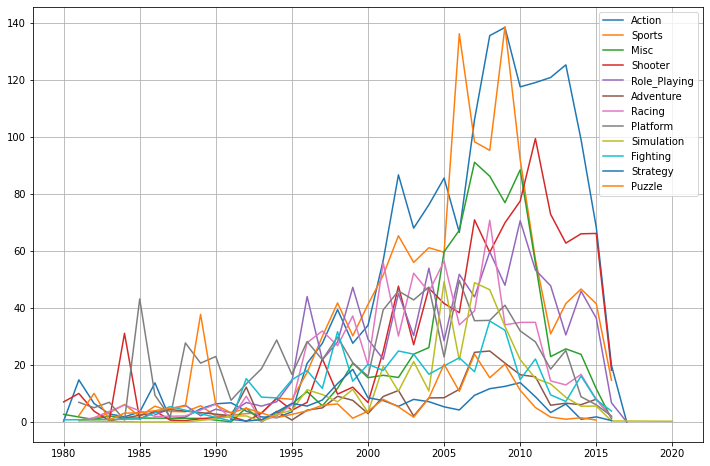

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(at_act1['Year'], at_act1['All_Sales'], label='Action')
plt.plot(at_spo1['Year'], at_spo1['All_Sales'], label='Sports')
plt.plot(at_mis1['Year'], at_mis1['All_Sales'], label='Misc')
plt.plot(at_sho1['Year'], at_sho1['All_Sales'], label='Shooter')
plt.plot(at_rol1['Year'], at_rol1['All_Sales'], label='Role_Playing')
plt.plot(at_adv1['Year'], at_adv1['All_Sales'], label='Adventure')
plt.plot(at_rac1['Year'], at_rac1['All_Sales'], label='Racing')
plt.plot(at_pla1['Year'], at_pla1['All_Sales'], label='Platform')
plt.plot(at_sim1['Year'], at_sim1['All_Sales'], label='Simulation')
plt.plot(at_fig1['Year'], at_fig1['All_Sales'], label='Fighting')
plt.plot(at_str1['Year'], at_str1['All_Sales'], label='Strategy')
plt.plot(at_puz1['Year'], at_puz1['All_Sales'], label='Puzzle')
plt.legend()
plt.grid()
plt.show()

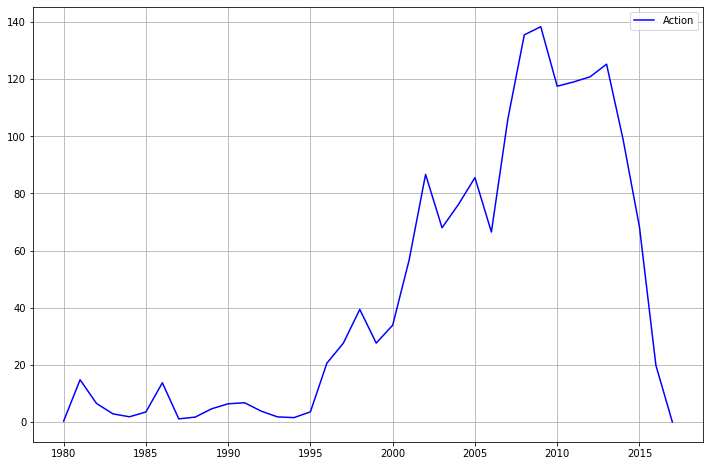

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(at_act1['Year'], at_act1['All_Sales'], label='Action', color='blue')
plt.legend()
plt.grid()
plt.show()

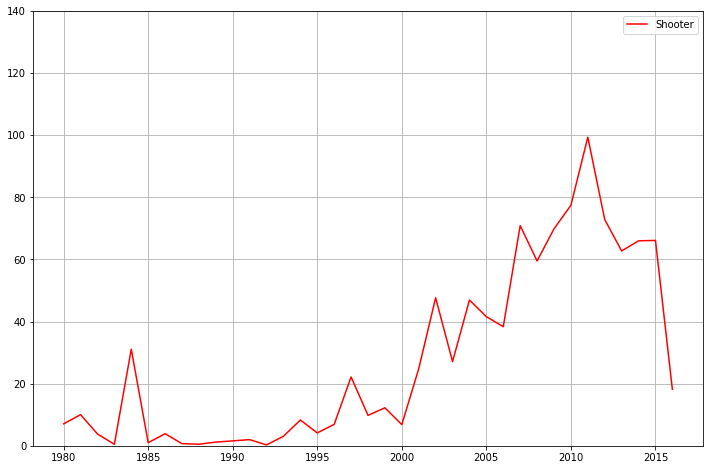

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(at_sho1['Year'], at_sho1['All_Sales'], label='Shooter', color='red')
plt.ylim(0,140)
plt.legend()
plt.grid()
plt.show()

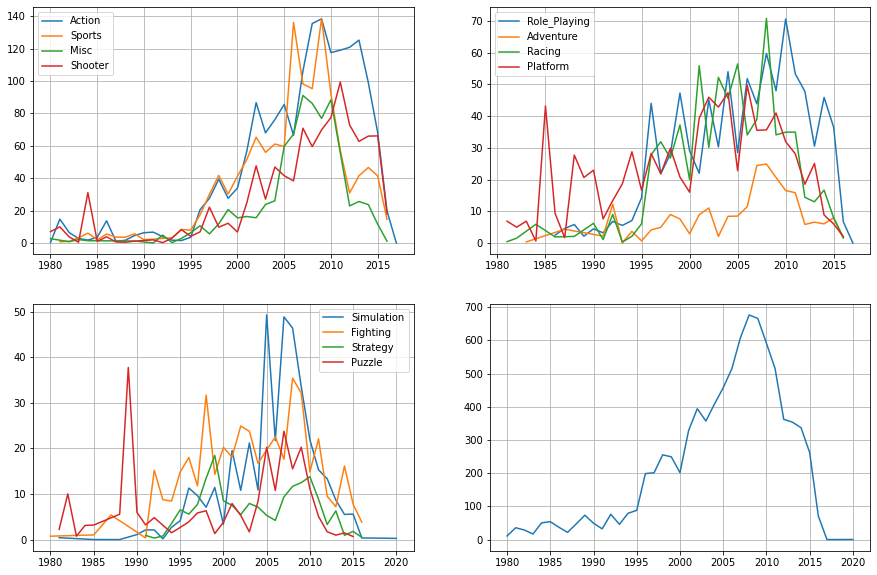

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(at_act1['Year'], at_act1['All_Sales'], label='Action')
axs[0, 0].plot(at_spo1['Year'], at_spo1['All_Sales'], label='Sports')
axs[0, 0].plot(at_mis1['Year'], at_mis1['All_Sales'], label='Misc')
axs[0, 0].plot(at_sho1['Year'], at_sho1['All_Sales'], label='Shooter')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(at_rol1['Year'], at_rol1['All_Sales'], label='Role_Playing')
axs[0, 1].plot(at_adv1['Year'], at_adv1['All_Sales'], label='Adventure')
axs[0, 1].plot(at_rac1['Year'], at_rac1['All_Sales'], label='Racing')
axs[0, 1].plot(at_pla1['Year'], at_pla1['All_Sales'], label='Platform')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(at_sim1['Year'], at_sim1['All_Sales'], label='Simulation')
axs[1, 0].plot(at_fig1['Year'], at_fig1['All_Sales'], label='Fighting')
axs[1, 0].plot(at_str1['Year'], at_str1['All_Sales'], label='Strategy')
axs[1, 0].plot(at_puz1['Year'], at_puz1['All_Sales'], label='Puzzle')
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(at_volumn['Year'], at_volumn['All_Sales'])
axs[1,1].grid()

plt.show()

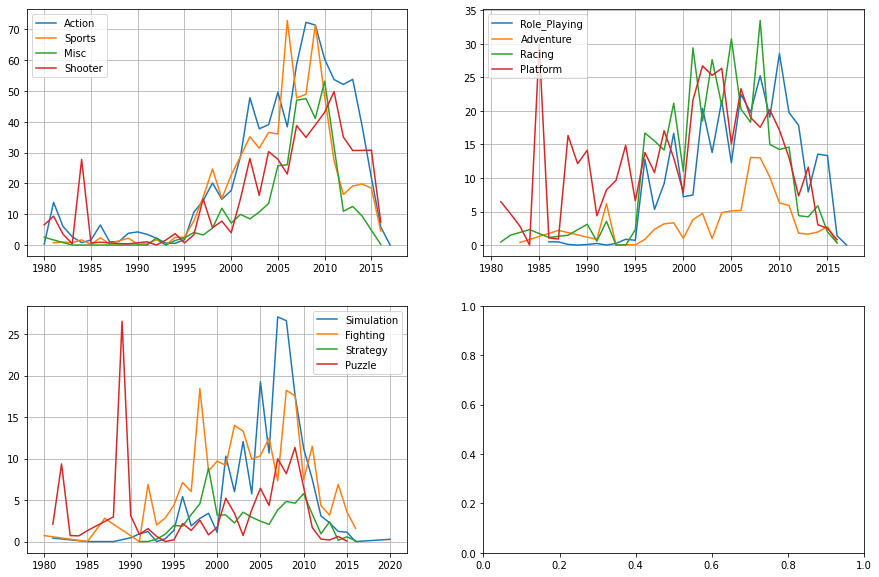

In [ ]:
# 북미지역의 연도별 게임 장르 출고량 추이
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(nt_act1['Year'], nt_act1['NA_Sales'], label='Action')
axs[0, 0].plot(nt_spo1['Year'], nt_spo1['NA_Sales'], label='Sports')
axs[0, 0].plot(nt_mis1['Year'], nt_mis1['NA_Sales'], label='Misc')
axs[0, 0].plot(nt_sho1['Year'], nt_sho1['NA_Sales'], label='Shooter')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(nt_rol1['Year'], nt_rol1['NA_Sales'], label='Role_Playing')
axs[0, 1].plot(nt_adv1['Year'], nt_adv1['NA_Sales'], label='Adventure')
axs[0, 1].plot(nt_rac1['Year'], nt_rac1['NA_Sales'], label='Racing')
axs[0, 1].plot(nt_pla1['Year'], nt_pla1['NA_Sales'], label='Platform')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(nt_sim1['Year'], nt_sim1['NA_Sales'], label='Simulation')
axs[1, 0].plot(nt_fig1['Year'], nt_fig1['NA_Sales'], label='Fighting')
axs[1, 0].plot(nt_str1['Year'], nt_str1['NA_Sales'], label='Strategy')
axs[1, 0].plot(nt_puz1['Year'], nt_puz1['NA_Sales'], label='Puzzle')
axs[1, 0].legend()
axs[1, 0].grid()

plt.show()

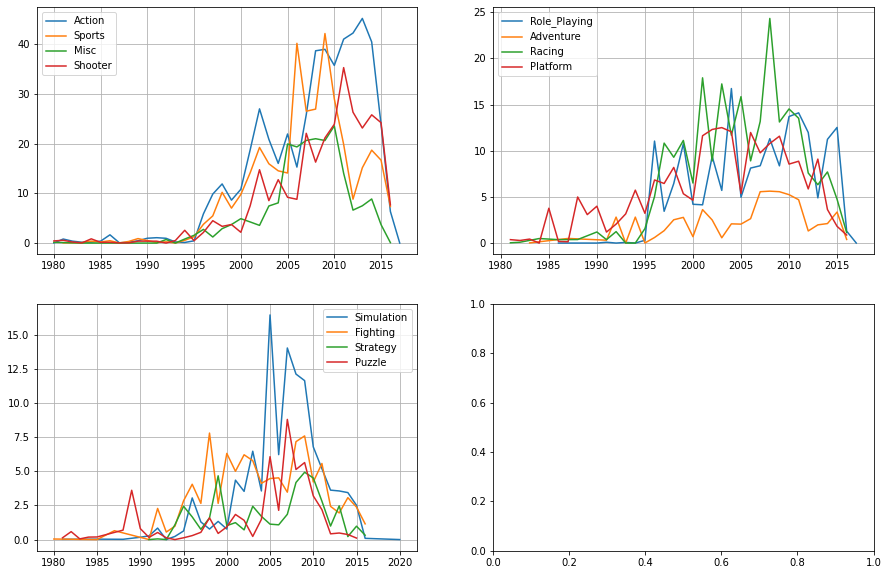

In [ ]:
# 유럽지역의 연도별 게임 장르 출고량 추이
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(et_act1['Year'], et_act1['EU_Sales'], label='Action')
axs[0, 0].plot(et_spo1['Year'], et_spo1['EU_Sales'], label='Sports')
axs[0, 0].plot(et_mis1['Year'], et_mis1['EU_Sales'], label='Misc')
axs[0, 0].plot(et_sho1['Year'], et_sho1['EU_Sales'], label='Shooter')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(et_rol1['Year'], et_rol1['EU_Sales'], label='Role_Playing')
axs[0, 1].plot(et_adv1['Year'], et_adv1['EU_Sales'], label='Adventure')
axs[0, 1].plot(et_rac1['Year'], et_rac1['EU_Sales'], label='Racing')
axs[0, 1].plot(et_pla1['Year'], et_pla1['EU_Sales'], label='Platform')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(et_sim1['Year'], et_sim1['EU_Sales'], label='Simulation')
axs[1, 0].plot(et_fig1['Year'], et_fig1['EU_Sales'], label='Fighting')
axs[1, 0].plot(et_str1['Year'], et_str1['EU_Sales'], label='Strategy')
axs[1, 0].plot(et_puz1['Year'], et_puz1['EU_Sales'], label='Puzzle')
axs[1, 0].legend()
axs[1, 0].grid()

plt.show()

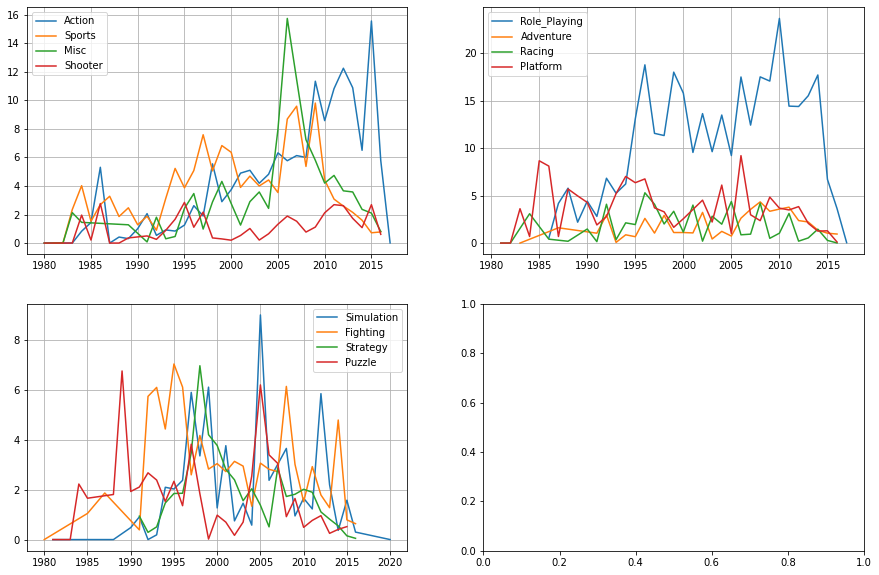

In [ ]:
# 일본지역 연도별 게임 장르 출고량 추이
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(jt_act1['Year'], jt_act1['JP_Sales'], label='Action')
axs[0, 0].plot(jt_spo1['Year'], jt_spo1['JP_Sales'], label='Sports')
axs[0, 0].plot(jt_mis1['Year'], jt_mis1['JP_Sales'], label='Misc')
axs[0, 0].plot(jt_sho1['Year'], jt_sho1['JP_Sales'], label='Shooter')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(jt_rol1['Year'], jt_rol1['JP_Sales'], label='Role_Playing')
axs[0, 1].plot(jt_adv1['Year'], jt_adv1['JP_Sales'], label='Adventure')
axs[0, 1].plot(jt_rac1['Year'], jt_rac1['JP_Sales'], label='Racing')
axs[0, 1].plot(jt_pla1['Year'], jt_pla1['JP_Sales'], label='Platform')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(jt_sim1['Year'], jt_sim1['JP_Sales'], label='Simulation')
axs[1, 0].plot(jt_fig1['Year'], jt_fig1['JP_Sales'], label='Fighting')
axs[1, 0].plot(jt_str1['Year'], jt_str1['JP_Sales'], label='Strategy')
axs[1, 0].plot(jt_puz1['Year'], jt_puz1['JP_Sales'], label='Puzzle')
axs[1, 0].legend()
axs[1, 0].grid()

plt.show()

## 출고량이 높은 게임에 대한 분석 및 시각화

게임 개발을 위해 각 지역의 사람들에게 인기가 있는 게임과 게임 장르에 대해 확인을 할 필요가 존재한다.  
2010년 이후의 게임 출고량을 기반으로 출고량이 높은 게임에 대해 확인한다.

최근 10년간 판매 데이터 기준

In [ ]:
# 개별 게임 출고량 순위를 확인하기 위해 전체 출고량의 기준으로 정렬
df1_sell = df1.sort_values(by='All_Sales',ascending=False)
df1_sell = df1_sell.drop('Unnamed: 0', axis=1).reset_index()
df1_sell = df1_sell.drop('index', axis=1)
df1_sell.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
95,Assassin's Creed IV: Black Flag,PS3,2013.0,Action,Ubisoft,1.33,1.71,0.13,0.73,3.90
96,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89
97,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
98,Sports Champions,PS3,2010.0,Sports,Sony Computer Entertainment,2.12,1.14,0.10,0.51,3.87


In [ ]:
# 출고량 기준으로 상위 1000개의 게임을 선별(상위 10개를 확인)
game_rank = df1_sell.groupby(['Name','Genre'])[['All_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
game_rank = game_rank.sort_values(by='All_Sales', ascending=False)
game_rank = game_rank.reset_index()
top1000 = game_rank[:1000]
top1000.head(10)

,Name,Genre,All_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Grand Theft Auto V,Action,55.92,23.46,23.04,1.39,8.03
1,Call of Duty: Modern Warfare 3,Shooter,30.84,15.58,11.29,0.62,3.35
2,Call of Duty: Black Ops II,Shooter,29.73,14.08,11.05,0.72,3.88
3,Call of Duty: Black Ops,Shooter,29.41,17.01,8.69,0.59,3.12
4,Call of Duty: Ghosts,Shooter,27.37,14.92,9.05,0.48,2.92
5,Call of Duty: Black Ops 3,Shooter,25.30,11.89,9.56,0.43,3.42
6,Minecraft,Misc,23.75,10.82,8.85,1.15,2.93
7,Call of Duty: Advanced Warfare,Shooter,21.89,10.44,8.18,0.34,2.93
8,Kinect Adventures!,Misc,21.82,14.97,4.94,0.24,1.67
9,The Elder Scrolls V: Skyrim,Role-Playing,19.28,8.73,7.66,0.35,2.54


In [ ]:
# 각 장르별로 총 출고량 확인
game_rank_genre = game_rank.groupby('Genre')['All_Sales'].sum()
game_rank_genre = game_rank_genre.reset_index()
game_rank_genre

,Genre,All_Sales
0,Action,669.60
1,Adventure,60.85
2,Fighting,81.53
3,Misc,229.30
4,Platform,120.73
5,Puzzle,21.18
6,Racing,123.64
7,Role-Playing,291.29
8,Shooter,462.64
9,Simulation,71.09


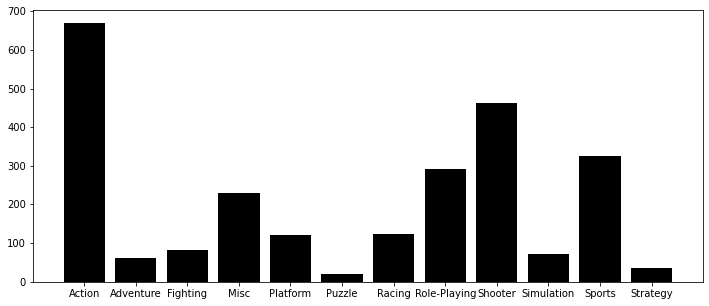

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(game_rank_genre['Genre'], game_rank_genre['All_Sales'], color='black');

In [ ]:
# 상위 50개의 게임에 시리즈 작품이 있는 지에 대해 확인
top1000_name = top1000.copy()
top1000_name['Game_Name'] = top1000_name['Name'].str.split(':').str[0]
top1000_name['Game_Name'] = top1000_name['Game_Name'].str.replace(r'\s','_')
top1000_name['Game_Name'] = top1000_name['Game_Name'].str.replace(r'\d','_')
top1000_name = top1000_name.groupby('Game_Name')['All_Sales'].sum()
top1000_name = top1000_name.sort_values(ascending=False)
top1000_name = top1000_name.reset_index()
top50_name = top1000_name[:50]
top50_name['Game_Name'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


array(['Call_of_Duty', 'FIFA___', 'Grand_Theft_Auto_V', 'NBA__K__',
       'Madden_NFL___', 'Battlefield__', 'Just_Dance__', 'FIFA_Soccer___',
       'Minecraft', "Assassin's_Creed", 'Batman', 'Kinect_Adventures!',
       'The_Elder_Scrolls_V', 'Mario_Kart__', 'The_Legend_of_Zelda',
       'Need_for_Speed', 'Destiny', 'Far_Cry__', 'Halo',
       'Pokemon_Black/Pokemon_White', 'Red_Dead_Redemption',
       "Assassin's_Creed_III", 'Just_Dance_____', 'Gran_Turismo__',
       'The_Sims__', 'Halo__', "Assassin's_Creed_IV", 'Animal_Crossing',
       'Super_Smash_Bros._for_Wii_U_and__DS', 'Fallout__', 'Skylanders',
       'Star_Wars_Battlefront_(____)', 'Pro_Evolution_Soccer_____',
       'Battlefield', 'Pokemon_Omega_Ruby/Pokemon_Alpha_Sapphire',
       'Diablo_III', 'Uncharted__', 'Super_Mario__D_Land',
       'Mass_Effect__', 'The_Last_of_Us', 'Zumba_Fitness',
       'LEGO_Marvel_Super_Heroes', 'New_Super_Mario_Bros.__',
       'Watch_Dogs', 'F______', 'Medal_of_Honor', 'Kinect_Sports',
  

시리즈 제품이 모두 잘되는지 확인  
top50_name에서 가장 인기가 많았던 3개의 게임(Call of Duty, FIFA, Grand Theft Auto)에 대해 해당 작품의 시리즈물도 인기가 있었는지 확인

In [ ]:
similar_test = df1_sell[['Name', 'Year', 'All_Sales']]
similar_test_call = similar_test[similar_test['Name'].str.contains(r'Call of Duty') == True]
similar_test_fifa = similar_test[similar_test['Name'].str.contains(r'FIFA') == True]
similar_test_gta = similar_test[similar_test['Name'].str.contains(r'Grand Theft Auto') == True]

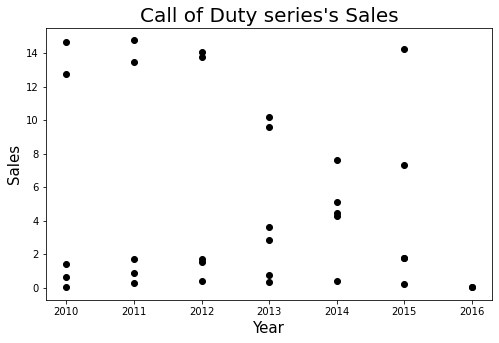

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x='Year', y='All_Sales', data=similar_test_call, color='black')
plt.title("Call of Duty series's Sales", fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

In [ ]:
similar_test_call.corr()

,Year,All_Sales
Year,1.00000,-0.19927
All_Sales,-0.19927,1.00000


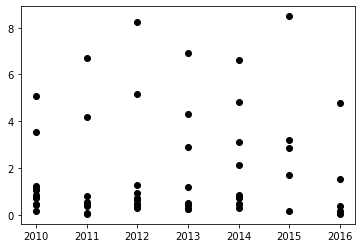

In [ ]:
plt.scatter(x='Year', y='All_Sales', data=similar_test_fifa, color='black')

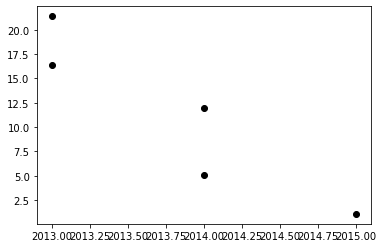

In [ ]:
plt.scatter(x='Year', y='All_Sales', data=similar_test_gta, color='black')

In [ ]:
df1['All_Sales'].sum(),df1['NA_Sales'].sum(), df1['EU_Sales'].sum(), df1['JP_Sales'].sum()

(2491.7799999999997, 1103.31, 829.47, 291.46000000000004)

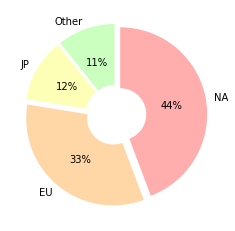

In [ ]:
# 전체 게임시장에 대해 각 지역이 차지하는 비율
a1 = df1['NA_Sales'].sum()
a2 = df1['EU_Sales'].sum()
a3 = df1['JP_Sales'].sum()
a4 = df1['Other_Sales'].sum()
val = [a1, a2, a3, a4]
ind = ['NA', 'EU', 'JP', 'Other']
explode = [0.05] * 4
wedgeprops={'width':0.7}
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf']

plt.pie(val, labels=ind,autopct='%1.f%%',startangle=90, counterclock=False,colors=colors, explode=explode, wedgeprops=wedgeprops )
plt.show()

## 지역에 따른 선호 게임 장르 확인

꾸준한 매출을 올리기 위해서는 당사가 진출하고자 하는 시장의 Needs를 확인해야 한다.  
시장의 Needs 확인을 위해 데이터를 통해 **지역별로 어떤 게임이 인기가 있었는지 확인할 필요가 존재**한다.

각 지역의 최근 동향을 확인하기 위해 2010년 이후의 데이터로 선호 게임 장르를 확인한다.

### 선호도 확인을 위한 이상치 선별


선호도 확인 전에 몇몇 인기있는 게임이 전체 데이터에 영향을 주는 것을 방지하기 위해 일정정도 이상의 출고량을 보인 데이터를 선별하고 제외한다. 

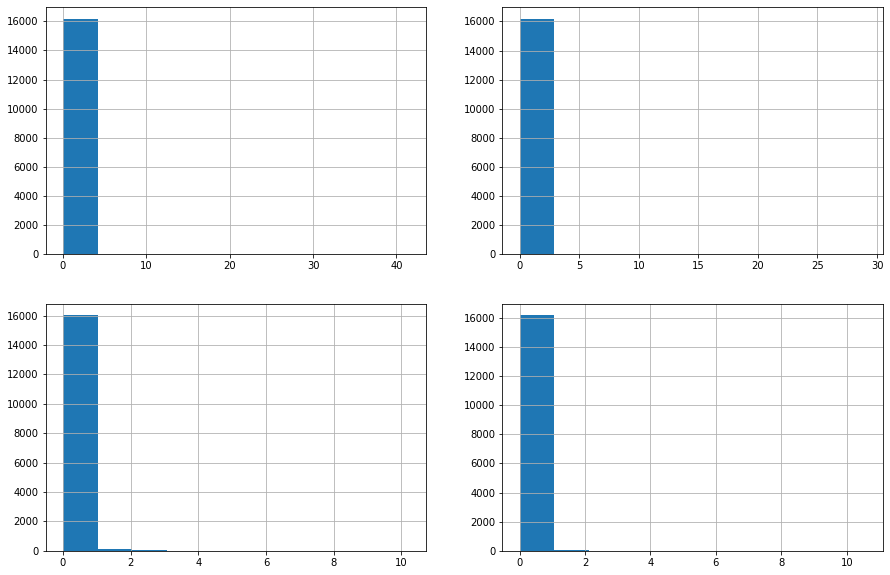

In [ ]:
# Histogram을 통한 각 지역의 출고량 분포 확인
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].hist(na_data['NA_Sales'])
axs[0, 0].grid()

axs[0, 1].hist(eu_data['EU_Sales'])
axs[0, 1].grid()

axs[1, 0].hist(jp_data['JP_Sales'])
axs[1, 0].grid()

axs[1, 1].hist(other_data['Other_Sales'])
axs[1,1].grid()

plt.show()

선호도 조사에 영향을 미치지 않을만큼 충분히 작은 비율을 차지하면서 높은 출고량을 가지고 있는 데이터 범위 확인

In [ ]:
na_down = na_data.query('NA_Sales < 3')
na_up = na_data.query('NA_Sales > 3')
len(na_up) / len(na_down)

0.009009009009009009

In [ ]:
eu_down = eu_data.query('EU_Sales < 3')
eu_up = eu_data.query('EU_Sales > 3')
len(eu_up) / len(eu_down)

0.0041424508470384565

In [ ]:
jp_down = jp_data.query('JP_Sales < 3')
jp_up = jp_data.query('JP_Sales > 3')
len(jp_up) / len(jp_down)

0.0024691358024691358

In [ ]:
other_down = other_data.query('Other_Sales < 3')
other_up = other_data.query('Other_Sales > 3')
len(other_up) / len(other_down)

0.00030795762503079576

### ***지역별로 인기가 있는 게임장르 & 인기가 없는 게임 장르***

***300만 이하의 데이터를 기준으로 지역별 선호도 조사 시작***  
선호도  
 = 각 지역에서 특정 장르를 좋아하는 정도로,  
  해당 데이터에서는 출시된 게임이 출고된 비율인 전환율과 각 장르별 평균 출고량을 곱하여 측정



In [ ]:
# 각 지역별 데이터 
na_sell = na_down.query('Year >= 2010')
eu_sell = eu_down.query('Year >= 2010')
jp_sell = jp_down.query('Year >= 2010')
other_sell = other_down.query('Year >= 2010')

# 지역별 출고가 된 게임과 출고가 되지 않은 게임 나누기
# 북미
na_sell_zero = na_sell.query('NA_Sales <= 0')
na_selling = na_sell.query('NA_Sales > 0')
# 유럽
eu_sell_zero = eu_sell.query('EU_Sales <= 0')
eu_selling = eu_sell.query('EU_Sales > 0')
# 일본
jp_sell_zero = jp_sell.query('JP_Sales <= 0')
jp_selling = jp_sell.query('JP_Sales > 0')
# 기타
other_sell_zero = other_sell.query('Other_Sales <= 0')
other_selling = other_sell.query('Other_Sales > 0')

In [ ]:
# 북미 전체 출시 게임 장르
na_sell_genre = na_sell.groupby('Genre')['NA_Sales'].count().reset_index()
na_sell_genre = na_sell_genre.rename(columns={'NA_Sales': 'Total_Count'})

# 북미 출고 데이터(출시가 된 게임 중에 출고가 된 게임의 데이터)
na_local = na_selling.groupby('Genre')['NA_Sales'].count().reset_index()
na_local_sell = na_selling.groupby('Genre')['NA_Sales'].sum().reset_index()
na_local_mean = na_selling.groupby('Genre')['NA_Sales'].mean().reset_index()
na_local = na_local.rename(columns={'NA_Sales': 'Sell_Count'})
na_local_sell = na_local_sell.rename(columns={'NA_Sales': 'Total_Sales'})
na_local_mean = na_local_mean.rename(columns={'NA_Sales': 'Mean_Sales'})

# 북미 미출고 데이터(출시가 된 게임 중에 출고가 되지 않은 게임의 데이터)
na_local_zero = na_sell_zero.groupby('Genre')['NA_Sales'].count().reset_index()
na_local_zero = na_local_zero.rename(columns={'NA_Sales' : 'NoSell_Count'})

# 북미 데이터
na_sell_data = pd.merge(na_sell_genre,na_local,how='outer', on='Genre')
na_sell_data = pd.merge(na_sell_data,na_local_zero,how='outer', on='Genre')
na_sell_data = pd.merge(na_sell_data,na_local_sell,how='outer', on='Genre')
na_sell_data = pd.merge(na_sell_data,na_local_mean,how='outer', on='Genre')
na_sell_data = na_sell_data.sort_values(by='Total_Count',ascending=False).reset_index()
na_sell_data = na_sell_data.drop('index', axis=1)
# 전환율 데이터(출시가 된 데이터 중에 출고(판매)가 된 데이터의 비율)
na_sell_data['Conversion_Rate'] = na_sell_data['Sell_Count']/na_sell_data['Total_Count']
# 선호도 데이터(장르별 평균 출고량 * 전환율 데이터)
na_sell_data['Prefer_Rate'] = na_sell_data['Mean_Sales'] * na_sell_data['Conversion_Rate']
na_sell_data

,Genre,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,Action,1429,916,513,259.13,0.282893,0.641008,0.181337
1,Sports,567,400,167,146.61,0.366525,0.705467,0.258571
2,Misc,556,350,206,86.65,0.247571,0.629496,0.155845
3,Role-Playing,552,276,276,83.98,0.304275,0.500000,0.152138
4,Adventure,538,154,384,20.64,0.134026,0.286245,0.038364
5,Shooter,380,336,44,137.69,0.409792,0.884211,0.362342
6,Racing,231,185,46,37.75,0.204054,0.800866,0.163420
7,Simulation,206,131,75,26.69,0.203740,0.635922,0.129563
8,Fighting,195,138,57,35.32,0.255942,0.707692,0.181128
9,Strategy,167,65,102,13.25,0.203846,0.389222,0.079341


In [ ]:
# 유럽 전체 출시 게임 장르
eu_sell_genre = eu_sell.groupby('Genre')['EU_Sales'].count().reset_index()
eu_sell_genre = eu_sell_genre.rename(columns={'EU_Sales': 'Total_Count'})

# 유럽 출고 데이터
eu_local = eu_selling.groupby('Genre')['EU_Sales'].count().reset_index()
eu_local_sell = eu_selling.groupby('Genre')['EU_Sales'].sum().reset_index()
eu_local_mean = eu_selling.groupby('Genre')['EU_Sales'].mean().reset_index()
eu_local = eu_local.rename(columns={'EU_Sales': 'Sell_Count'})
eu_local_sell = eu_local_sell.rename(columns={'EU_Sales': 'Total_Sales'})
eu_local_mean = eu_local_mean.rename(columns={'EU_Sales': 'Mean_Sales'})

# 유럽 미출고 데이터
eu_local_zero = eu_sell_zero.groupby('Genre')['EU_Sales'].count().reset_index()
eu_local_zero = eu_local_zero.rename(columns={'EU_Sales' : 'NoSell_Count'})

# 유럽 데이터
eu_sell_data = pd.merge(eu_sell_genre,eu_local,how='outer', on='Genre')
eu_sell_data = pd.merge(eu_sell_data,eu_local_zero,how='outer', on='Genre')
eu_sell_data = pd.merge(eu_sell_data,eu_local_sell,how='outer', on='Genre')
eu_sell_data = pd.merge(eu_sell_data,eu_local_mean,how='outer', on='Genre')
eu_sell_data = eu_sell_data.sort_values(by='Total_Count',ascending=False).reset_index()
eu_sell_data = eu_sell_data.drop('index', axis=1)
eu_sell_data['Conversion_Rate'] = eu_sell_data['Sell_Count']/eu_sell_data['Total_Count']
eu_sell_data['Prefer_Rate'] = eu_sell_data['Mean_Sales'] * eu_sell_data['Conversion_Rate']
eu_sell_data

,Genre,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,Action,1429,974,455,206.07,0.211571,0.681596,0.144206
1,Sports,562,376,186,86.46,0.229947,0.669039,0.153843
2,Misc,559,302,257,56.33,0.186523,0.540250,0.100769
3,Role-Playing,553,273,280,59.90,0.219414,0.493671,0.108318
4,Adventure,538,167,371,19.07,0.114192,0.310409,0.035446
5,Shooter,385,329,56,121.86,0.370395,0.854545,0.316519
6,Racing,231,189,42,46.72,0.247196,0.818182,0.202251
7,Simulation,206,120,86,25.20,0.210000,0.582524,0.122330
8,Fighting,196,131,65,20.77,0.158550,0.668367,0.105969
9,Strategy,167,95,72,12.30,0.129474,0.568862,0.073653


In [ ]:
# 일본 전체 출시 게임 장르
jp_sell_genre = jp_sell.groupby('Genre')['JP_Sales'].count().reset_index()
jp_sell_genre = jp_sell_genre.rename(columns={'JP_Sales': 'Total_Count'})

# 일본 출고 데이터
jp_local = jp_selling.groupby('Genre')['JP_Sales'].count().reset_index()
jp_local_sell = jp_selling.groupby('Genre')['JP_Sales'].sum().reset_index()
jp_local_mean = jp_selling.groupby('Genre')['JP_Sales'].mean().reset_index()
jp_local = jp_local.rename(columns={'JP_Sales': 'Sell_Count'})
jp_local_sell = jp_local_sell.rename(columns={'JP_Sales': 'Total_Sales'})
jp_local_mean = jp_local_mean.rename(columns={'JP_Sales': 'Mean_Sales'})

# 일본 미출고 데이터
jp_local_zero = jp_sell_zero.groupby('Genre')['JP_Sales'].count().reset_index()
jp_local_zero = jp_local_zero.rename(columns={'JP_Sales' : 'NoSell_Count'})

# 일본 데이터
jp_sell_data = pd.merge(jp_sell_genre,jp_local,how='outer', on='Genre')
jp_sell_data = pd.merge(jp_sell_data,jp_local_zero,how='outer', on='Genre')
jp_sell_data = pd.merge(jp_sell_data,jp_local_sell,how='outer', on='Genre')
jp_sell_data = pd.merge(jp_sell_data,jp_local_mean,how='outer', on='Genre')
jp_sell_data = jp_sell_data.sort_values(by='Total_Count',ascending=False).reset_index()
jp_sell_data = jp_sell_data.drop('index', axis=1)
jp_sell_data['Conversion_Rate'] = jp_sell_data['Sell_Count']/jp_sell_data['Total_Count']
jp_sell_data['Prefer_Rate'] = jp_sell_data['Mean_Sales'] * jp_sell_data['Conversion_Rate']
jp_sell_data

,Genre,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,Action,1434,703,731,70.38,0.100114,0.490237,0.049079
1,Sports,569,144,425,15.34,0.106528,0.253076,0.026960
2,Misc,561,191,370,21.45,0.112304,0.340463,0.038235
3,Role-Playing,550,441,109,72.74,0.164943,0.801818,0.132255
4,Adventure,538,371,167,15.30,0.041240,0.689591,0.028439
5,Shooter,395,160,235,13.54,0.084625,0.405063,0.034278
6,Racing,233,53,180,6.65,0.125472,0.227468,0.028541
7,Simulation,205,58,147,8.84,0.152414,0.282927,0.043122
8,Fighting,196,131,65,13.75,0.104962,0.668367,0.070153
9,Strategy,167,71,96,6.60,0.092958,0.425150,0.039521


In [ ]:
# 기타 전체 출시 게임 장르
other_sell_genre = other_sell.groupby('Genre')['Other_Sales'].count().reset_index()
other_sell_genre = other_sell_genre.rename(columns={'Other_Sales': 'Total_Count'})

# 기타 출고 데이터
other_local = other_selling.groupby('Genre')['Other_Sales'].count().reset_index()
other_local_sell = other_selling.groupby('Genre')['Other_Sales'].sum().reset_index()
other_local_mean = other_selling.groupby('Genre')['Other_Sales'].mean().reset_index()
other_local = other_local.rename(columns={'Other_Sales': 'Sell_Count'})
other_local_sell = other_local_sell.rename(columns={'Other_Sales': 'Total_Sales'})
other_local_mean = other_local_mean.rename(columns={'Other_Sales': 'Mean_Sales'})

# 기타 미출고 데이터
other_local_zero = other_sell_zero.groupby('Genre')['Other_Sales'].count().reset_index()
other_local_zero = other_local_zero.rename(columns={'Other_Sales' : 'NoSell_Count'})

# 기타 데이터
other_sell_data = pd.merge(other_sell_genre,other_local,how='outer', on='Genre')
other_sell_data = pd.merge(other_sell_data,other_local_zero,how='outer', on='Genre')
other_sell_data = pd.merge(other_sell_data,other_local_sell,how='outer', on='Genre')
other_sell_data = pd.merge(other_sell_data,other_local_mean,how='outer', on='Genre')
other_sell_data = other_sell_data.sort_values(by='Total_Count',ascending=False).reset_index()
other_sell_data = other_sell_data.drop('index', axis=1)
other_sell_data['Conversion_Rate'] = other_sell_data['Sell_Count']/other_sell_data['Total_Count']
other_sell_data['Prefer_Rate'] = other_sell_data['Mean_Sales'] * other_sell_data['Conversion_Rate']
other_sell_data

,Genre,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,Action,1433,897,536,73.69,0.082152,0.625960,0.051424
1,Sports,569,427,142,39.28,0.091991,0.750439,0.069033
2,Misc,561,351,210,20.20,0.057550,0.625668,0.036007
3,Role-Playing,556,277,279,23.09,0.083357,0.498201,0.041529
4,Adventure,538,150,388,5.84,0.038933,0.278810,0.010855
5,Shooter,395,330,65,55.03,0.166758,0.835443,0.139316
6,Racing,233,188,45,15.86,0.084362,0.806867,0.068069
7,Simulation,206,119,87,6.00,0.050420,0.577670,0.029126
8,Fighting,196,130,66,8.45,0.065000,0.663265,0.043112
9,Strategy,167,72,95,3.50,0.048611,0.431138,0.020958


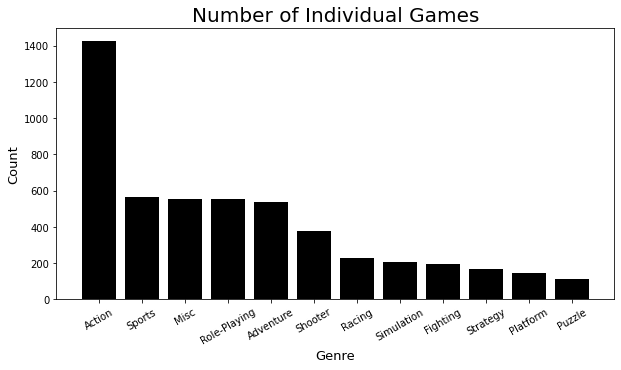

In [ ]:
# 출시된 게임 데이터
plt.figure(figsize=(10,5))
plt.title("Number of Individual Games", fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.xticks(rotation=30)
plt.ylabel('Count', fontsize=13)
plt.bar(na_sell_data['Genre'], na_sell_data['Total_Count'], color='black');

### ***지역에 따른 출고량 데이터 시각화***

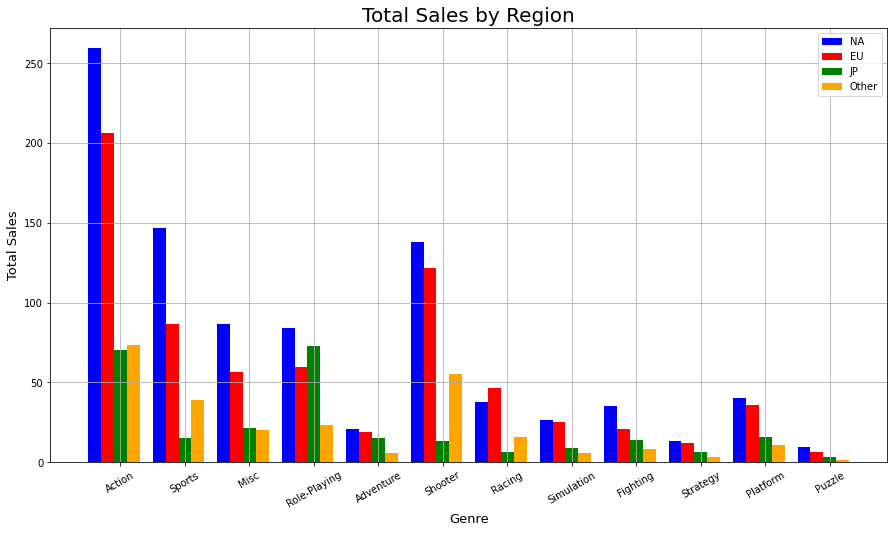

In [ ]:
n = na_sell_data.shape[0]
ind = np.arange(n)
w=0.2

plt.figure(figsize=(15,8))
plt.bar(ind-2*w, na_sell_data['Total_Sales'], color='blue', width=w, label='NA')
plt.bar(ind-w, eu_sell_data['Total_Sales'], color='red', width=w, label='EU')
plt.bar(ind, jp_sell_data['Total_Sales'], color='green', width=w, label='JP')
plt.bar(ind+w, other_sell_data['Total_Sales'], color='orange', width=w, label='Other')
plt.xticks(ind, na_sell_data['Genre'], rotation=30)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('Genre', fontsize=13)
plt.title('Total Sales by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

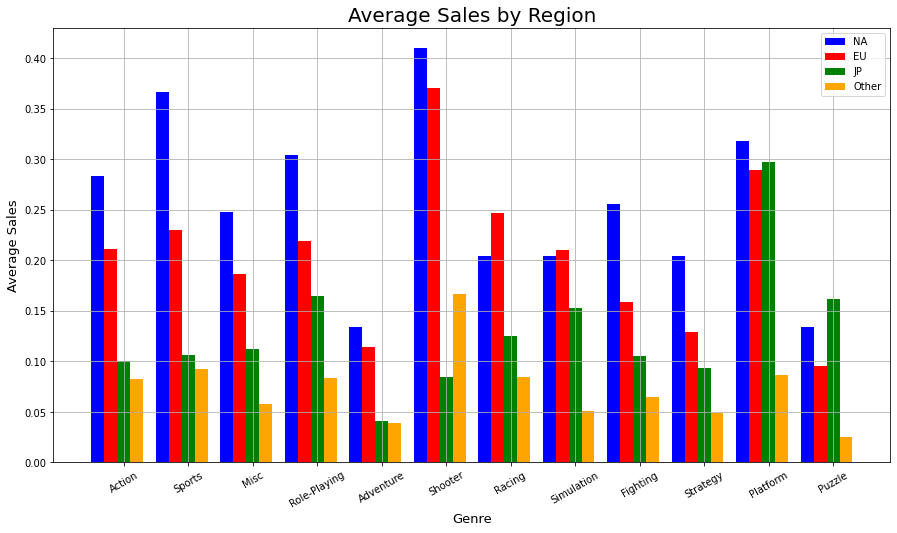

In [ ]:
n = na_sell_data.shape[0]
ind = np.arange(n)
w=0.2

plt.figure(figsize=(15,8))
plt.bar(ind-2*w, na_sell_data['Mean_Sales'], color='blue', width=w, label='NA')
plt.bar(ind-w, eu_sell_data['Mean_Sales'], color='red', width=w, label='EU')
plt.bar(ind, jp_sell_data['Mean_Sales'], color='green', width=w, label='JP')
plt.bar(ind+w, other_sell_data['Mean_Sales'], color='orange', width=w, label='Other')
plt.xticks(ind, na_sell_data['Genre'], rotation=30)
plt.ylabel('Average Sales', fontsize=13)
plt.xlabel('Genre', fontsize=13)
plt.title('Average Sales by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

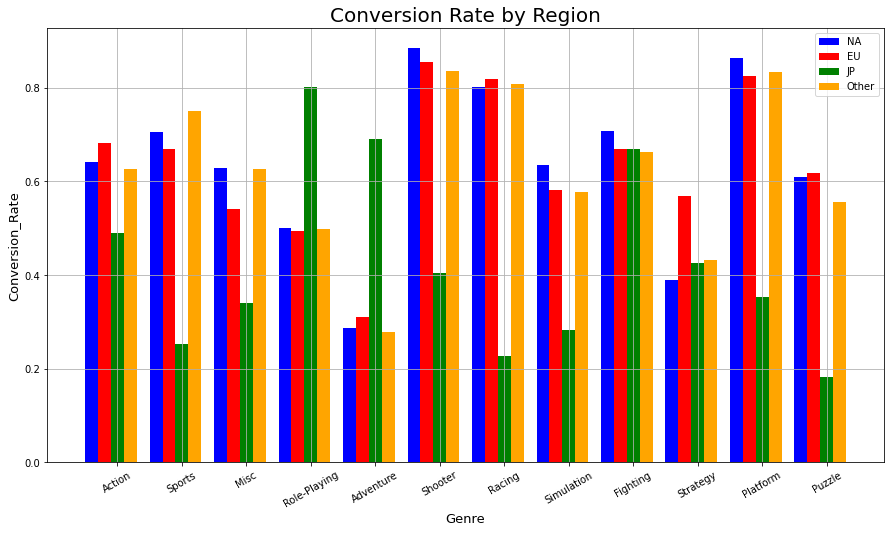

In [ ]:
n = na_sell_data.shape[0]
ind = np.arange(n)
w=0.2

plt.figure(figsize=(15,8))
plt.bar(ind-2*w, na_sell_data['Conversion_Rate'], color='blue', width=w, label='NA')
plt.bar(ind-w, eu_sell_data['Conversion_Rate'], color='red', width=w, label='EU')
plt.bar(ind, jp_sell_data['Conversion_Rate'], color='green', width=w, label='JP')
plt.bar(ind+w, other_sell_data['Conversion_Rate'], color='orange', width=w, label='Other')
plt.xticks(ind, na_sell_data['Genre'], rotation=30)
plt.ylabel('Conversion_Rate', fontsize=13)
plt.xlabel('Genre', fontsize=13)
plt.title('Conversion Rate by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

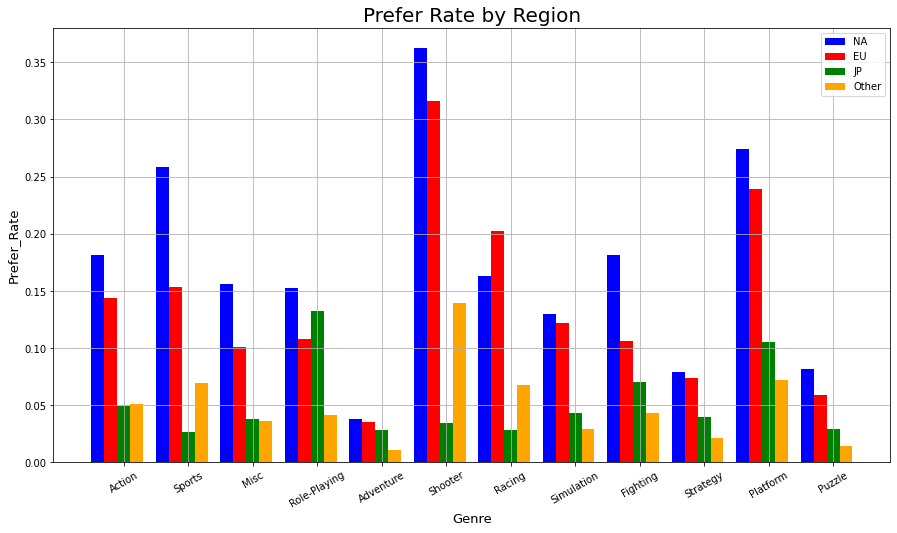

In [ ]:
n = na_sell_data.shape[0]
ind = np.arange(n)
w=0.2

plt.figure(figsize=(15,8))
plt.bar(ind-2*w, na_sell_data['Prefer_Rate'], color='blue', width=w, label='NA')
plt.bar(ind-w, eu_sell_data['Prefer_Rate'], color='red', width=w, label='EU')
plt.bar(ind, jp_sell_data['Prefer_Rate'], color='green', width=w, label='JP')
plt.bar(ind+w, other_sell_data['Prefer_Rate'], color='orange', width=w, label='Other')
plt.xticks(ind, na_sell_data['Genre'], rotation=30)
plt.ylabel('Prefer_Rate', fontsize=13)
plt.xlabel('Genre', fontsize=13)
plt.title('Prefer Rate by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

### ***지역별 인기있는 게임 플랫폼***


게임 개발 시에 어떤 플랫폼에 맞게 우선적으로 개발을 할 것인지 확인하기 위한 지역별 게임 플랫폼 선호도 조사

In [ ]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# 북미 전체 게임플랫폼
na_sell_plat = na_sell.groupby(['Platform'])['NA_Sales'].count().reset_index()
na_sell_plat = na_sell_plat.rename(columns={'NA_Sales': 'Total_Count'})

# 북미 게임플랫폼 출고 데이터
na_local_plat = na_selling.groupby(['Platform'])['NA_Sales'].count().reset_index()
na_local_plat_sell = na_selling.groupby(['Platform'])['NA_Sales'].sum().reset_index()
na_local_plat_mean = na_selling.groupby(['Platform'])['NA_Sales'].mean().reset_index()
na_local_plat = na_local_plat.rename(columns={'NA_Sales': 'Sell_Count'})
na_local_plat_sell = na_local_plat_sell.rename(columns={'NA_Sales': 'Total_Sales'})
na_local_plat_mean = na_local_plat_mean.rename(columns={'NA_Sales': 'Mean_Sales'})

# 북미 게임플랫폼 미출고 데이터
na_local_plat_zero = na_sell_zero.groupby(['Platform'])['NA_Sales'].count().reset_index()
na_local_plat_zero = na_local_plat_zero.rename(columns={'NA_Sales' : 'NoSell_Count'})

# 북미 데이터
na_data_plat = pd.merge(na_sell_plat,na_local_plat,how='outer', on='Platform')
na_data_plat = pd.merge(na_data_plat,na_local_plat_zero,how='outer', on='Platform')
na_data_plat = pd.merge(na_data_plat,na_local_plat_sell,how='outer', on='Platform')
na_data_plat = pd.merge(na_data_plat,na_local_plat_mean,how='outer', on='Platform')
na_data_plat = na_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
na_data_plat = na_data_plat.drop('index', axis=1)
na_data_plat['Conversion_Rate'] = na_data_plat['Sell_Count']/na_data_plat['Total_Count']
na_data_plat['Prefer_Rate'] = na_data_plat['Mean_Sales'] * na_data_plat['Conversion_Rate']
na_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,PS3,879,617,262,200.15,0.324392,0.701934,0.227702
1,X360,664,576,88,227.14,0.394340,0.867470,0.342078
2,DS,511,334,177,57.27,0.171467,0.653620,0.112074
3,PSP,499,81,418,9.58,0.118272,0.162325,0.019198
4,3DS,493,245,248,52.10,0.212653,0.496957,0.105680
5,PC,455,223,232,37.97,0.170269,0.490110,0.083451
6,Wii,444,362,82,98.04,0.270829,0.815315,0.220811
7,PSV,409,138,271,16.07,0.116449,0.337408,0.039291
8,PS4,333,242,91,86.23,0.356322,0.726727,0.258949
9,XOne,210,192,18,75.46,0.393021,0.914286,0.359333


In [ ]:
# 유럽 전체 게임플랫폼
eu_sell_plat = eu_sell.groupby(['Platform'])['EU_Sales'].count().reset_index()
eu_sell_plat = eu_sell_plat.rename(columns={'EU_Sales': 'Total_Count'})

# 유럽 게임플랫폼 출고 데이터
eu_local_plat = eu_selling.groupby(['Platform'])['EU_Sales'].count().reset_index()
eu_local_plat_sell = eu_selling.groupby(['Platform'])['EU_Sales'].sum().reset_index()
eu_local_plat_mean = eu_selling.groupby(['Platform'])['EU_Sales'].mean().reset_index()
eu_local_plat = eu_local_plat.rename(columns={'EU_Sales': 'Sell_Count'})
eu_local_plat_sell = eu_local_plat_sell.rename(columns={'EU_Sales': 'Total_Sales'})
eu_local_plat_mean = eu_local_plat_mean.rename(columns={'EU_Sales': 'Mean_Sales'})

# 유럽 게임플랫폼 미출고 데이터
eu_local_plat_zero = eu_sell_zero.groupby(['Platform'])['EU_Sales'].count().reset_index()
eu_local_plat_zero = eu_local_plat_zero.rename(columns={'EU_Sales' : 'NoSell_Count'})

# 유럽 데이터
eu_data_plat = pd.merge(eu_sell_plat,eu_local_plat,how='outer', on='Platform')
eu_data_plat = pd.merge(eu_data_plat,eu_local_plat_zero,how='outer', on='Platform')
eu_data_plat = pd.merge(eu_data_plat,eu_local_plat_sell,how='outer', on='Platform')
eu_data_plat = pd.merge(eu_data_plat,eu_local_plat_mean,how='outer', on='Platform')
eu_data_plat = eu_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
eu_data_plat = eu_data_plat.drop('index', axis=1)
eu_data_plat['Conversion_Rate'] = eu_data_plat['Sell_Count']/eu_data_plat['Total_Count']
eu_data_plat['Prefer_Rate'] = eu_data_plat['Mean_Sales'] * eu_data_plat['Conversion_Rate']
eu_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,PS3,873,609,264,169.61,0.278506,0.697595,0.194284
1,X360,674,560,114,145.10,0.259107,0.830861,0.215282
2,DS,511,236,275,27.06,0.114661,0.461840,0.052955
3,PSP,499,64,435,7.86,0.122813,0.128257,0.015752
4,3DS,495,236,259,43.89,0.185975,0.476768,0.088667
5,PC,455,426,29,65.85,0.154577,0.936264,0.144725
6,Wii,449,288,161,62.42,0.216736,0.641425,0.139020
7,PSV,409,143,266,16.27,0.113776,0.349633,0.039780
8,PS4,327,248,79,87.48,0.352742,0.758410,0.267523
9,XOne,212,199,13,45.63,0.229296,0.938679,0.215236


In [ ]:
# 일본 전체 게임플랫폼
jp_sell_plat = jp_sell.groupby(['Platform'])['JP_Sales'].count().reset_index()
jp_sell_plat = jp_sell_plat.rename(columns={'JP_Sales': 'Total_Count'})

# 일본 게임플랫폼 출고 데이터
jp_local_plat = jp_selling.groupby(['Platform'])['JP_Sales'].count().reset_index()
jp_local_plat_sell = jp_selling.groupby(['Platform'])['JP_Sales'].sum().reset_index()
jp_local_plat_mean = jp_selling.groupby(['Platform'])['JP_Sales'].mean().reset_index()
jp_local_plat = jp_local_plat.rename(columns={'JP_Sales': 'Sell_Count'})
jp_local_plat_sell = jp_local_plat_sell.rename(columns={'JP_Sales': 'Total_Sales'})
jp_local_plat_mean = jp_local_plat_mean.rename(columns={'JP_Sales': 'Mean_Sales'})

# 일본 게임플랫폼 미출고 데이터
jp_local_plat_zero = jp_sell_zero.groupby(['Platform'])['JP_Sales'].count().reset_index()
jp_local_plat_zero = jp_local_plat_zero.rename(columns={'JP_Sales' : 'NoSell_Count'})

# 일본 데이터
jp_data_plat = pd.merge(jp_sell_plat,jp_local_plat,how='outer', on='Platform')
jp_data_plat = pd.merge(jp_data_plat,jp_local_plat_zero,how='outer', on='Platform')
jp_data_plat = pd.merge(jp_data_plat,jp_local_plat_sell,how='outer', on='Platform')
jp_data_plat = pd.merge(jp_data_plat,jp_local_plat_mean,how='outer', on='Platform')
jp_data_plat = jp_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
jp_data_plat = jp_data_plat.drop('index', axis=1)
jp_data_plat['Conversion_Rate'] = jp_data_plat['Sell_Count']/jp_data_plat['Total_Count']
jp_data_plat['Prefer_Rate'] = jp_data_plat['Mean_Sales'] * jp_data_plat['Conversion_Rate']
jp_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,PS3,884,527.0,357,59.03,0.112011,0.596154,0.066776
1,X360,680,198.0,482,5.45,0.027525,0.291176,0.008015
2,DS,510,155.0,355,19.06,0.122968,0.303922,0.037373
3,PSP,498,454.0,44,37.28,0.082115,0.911647,0.074859
4,3DS,494,345.0,149,78.90,0.228696,0.698381,0.159717
5,PC,455,NaN,455,NaN,NaN,NaN,NaN
6,Wii,450,69.0,381,15.26,0.221159,0.153333,0.033911
7,PSV,409,339.0,70,20.81,0.061386,0.828851,0.050880
8,PS4,335,198.0,137,14.04,0.070909,0.591045,0.041910
9,XOne,212,22.0,190,0.34,0.015455,0.103774,0.001604


In [ ]:
# 기타지역 전체 게임플랫폼
other_sell_plat = other_sell.groupby(['Platform'])['Other_Sales'].count().reset_index()
other_sell_plat = other_sell_plat.rename(columns={'Other_Sales': 'Total_Count'})

# 기타지역 게임플랫폼 출고 데이터
other_local_plat = other_selling.groupby(['Platform'])['Other_Sales'].count().reset_index()
other_local_plat_sell = other_selling.groupby(['Platform'])['Other_Sales'].sum().reset_index()
other_local_plat_mean = other_selling.groupby(['Platform'])['Other_Sales'].mean().reset_index()
other_local_plat = other_local_plat.rename(columns={'Other_Sales': 'Sell_Count'})
other_local_plat_sell = other_local_plat_sell.rename(columns={'Other_Sales': 'Total_Sales'})
other_local_plat_mean = other_local_plat_mean.rename(columns={'Other_Sales': 'Mean_Sales'})

# 기타지역 게임플랫폼 미출고 데이터
other_local_plat_zero = other_sell_zero.groupby(['Platform'])['Other_Sales'].count().reset_index()
other_local_plat_zero = other_local_plat_zero.rename(columns={'Other_Sales' : 'NoSell_Count'})

# 기타지역 데이터
other_data_plat = pd.merge(other_sell_plat,other_local_plat,how='outer', on='Platform')
other_data_plat = pd.merge(other_data_plat,other_local_plat_zero,how='outer', on='Platform')
other_data_plat = pd.merge(other_data_plat,other_local_plat_sell,how='outer', on='Platform')
other_data_plat = pd.merge(other_data_plat,other_local_plat_mean,how='outer', on='Platform')
other_data_plat = other_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
other_data_plat = other_data_plat.drop('index', axis=1)
other_data_plat['Conversion_Rate'] = other_data_plat['Sell_Count']/other_data_plat['Total_Count']
other_data_plat['Prefer_Rate'] = other_data_plat['Mean_Sales'] * other_data_plat['Conversion_Rate']
other_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,PS3,883,648,235,86.51,0.133503,0.733862,0.097973
1,X360,680,569,111,47.02,0.082636,0.836765,0.069147
2,DS,512,277,235,8.57,0.030939,0.541016,0.016738
3,PSP,499,82,417,4.72,0.057561,0.164329,0.009459
4,3DS,498,223,275,11.76,0.052735,0.447791,0.023614
5,PC,455,302,153,15.66,0.051854,0.663736,0.034418
6,Wii,450,332,118,18.15,0.054669,0.737778,0.040333
7,PSV,409,151,258,8.41,0.055695,0.369193,0.020562
8,PS4,335,256,79,43.00,0.167969,0.764179,0.128358
9,XOne,212,166,46,11.92,0.071807,0.783019,0.056226


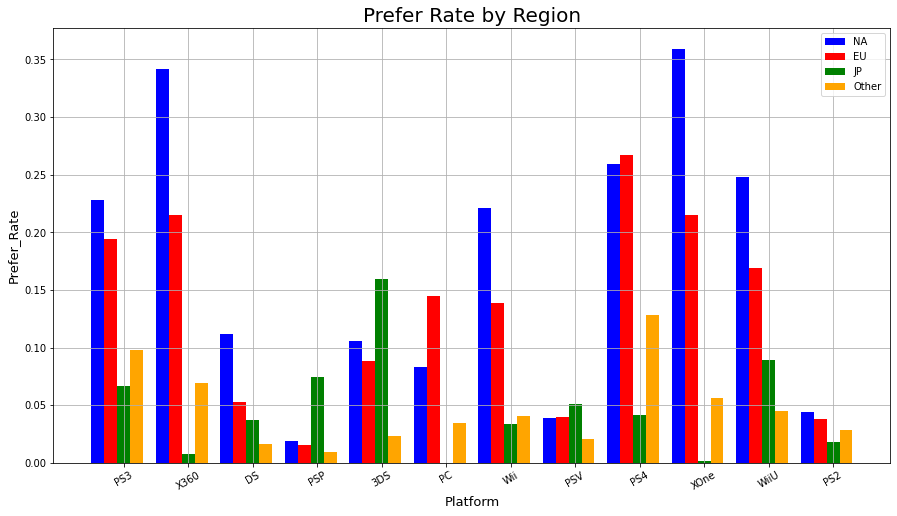

In [ ]:
n = na_data_plat.shape[0]
ind = np.arange(n)
w=0.2

plt.figure(figsize=(15,8))
plt.bar(ind-2*w, na_data_plat['Prefer_Rate'], color='blue', width=w, label='NA')
plt.bar(ind-w, eu_data_plat['Prefer_Rate'], color='red', width=w, label='EU')
plt.bar(ind, jp_data_plat['Prefer_Rate'], color='green', width=w, label='JP')
plt.bar(ind+w, other_data_plat['Prefer_Rate'], color='orange', width=w, label='Other')
plt.xticks(ind, na_data_plat['Platform'], rotation=30)
plt.ylabel('Prefer_Rate', fontsize=13)
plt.xlabel('Platform', fontsize=13)
plt.title('Prefer Rate by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

## 당사의 다음 분기 게임 개발


### 다음 분기 게임 개발을 위한 데이터 선택


다음 분기에 개발할 게임을 결정하기 위해 어떤 데이터를 기반으로 결정을 해야될지 확인


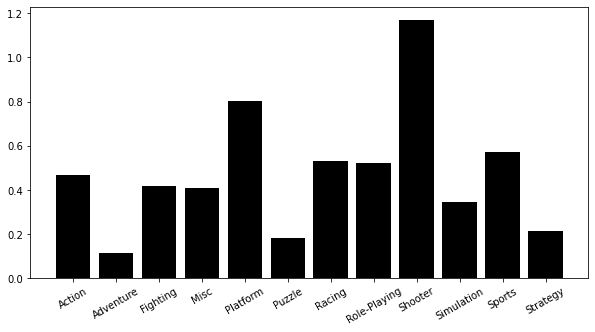

In [ ]:
# 전체 시장 내, 각 장르별 평균 출고량
all_genre = df1.groupby('Genre')['All_Sales'].mean().reset_index()
all_genre = all_genre.rename(columns={'All_Sales': 'Mean_Sales'})

plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
plt.bar(all_genre['Genre'], all_genre['Mean_Sales'], color='black');

In [ ]:
all_1 = df1.groupby('Genre')['All_Sales'].sum().reset_index()
all_2 = df1.groupby('Genre')['All_Sales'].count().reset_index()
all_1 = all_1.rename(columns={'All_Sales': 'Total_Sales'})
all_2 = all_2.rename(columns={'All_Sales': 'Number_of_Game'})
all_genre = pd.merge(all_1, all_genre, how='outer', on='Genre')
all_genre = pd.merge(all_genre, all_2, how='outer', on='Genre')
all_genre = all_genre.set_index('Genre')

all_genre

,Total_Sales,Mean_Sales,Number_of_Game
Genre,,,
Action,669.60,0.466946,1434
Adventure,60.85,0.113104,538
Fighting,81.53,0.415969,196
Misc,229.30,0.408734,561
Platform,120.73,0.804867,150
Puzzle,21.18,0.184174,115
Racing,123.64,0.530644,233
Role-Playing,291.29,0.523903,556
Shooter,462.64,1.171241,395


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()
all_genre = scaler.fit_transform(all_genre)
pca.fit(all_genre)
all_genre = pca.fit(all_genre)

pca.explained_variance_ratio_

array([0.67006515, 0.32319578, 0.00673907])

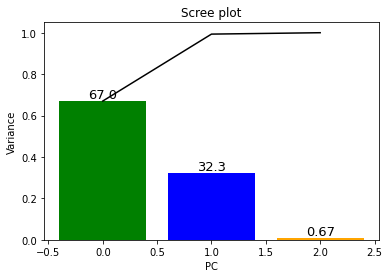

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['green', 'blue',  'orange']) # Bar plot
    ax.plot(ind, cumvals, color = 'black') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:4])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

PCA 결과, 2개의 주성분을 사용하면 전체 데이터의 99%를 설명할 수 있기 때문에 다음 분기에 어떤 게임을 개발하기 위해 2개의 데이터를 살펴보는 것이 적당하다.  

개발할 게임 장르를 선택하기 위해 우선적으로 ***총 출고량***을 살펴본 후,   
가장 많은 출고량을 가진 3개의 데이터를 기준으로 ***평균 출고량을 비교***할 것이다.

In [ ]:
'''
귀무가설 : Action 장르가 Shooter 장르과 출고량이 같거나 많다  
대립가설 : Shooter 장르가 Action 장르보다 출고량이 많다
'''

from scipy import stats
act_test = at_act['All_Sales']
sho_test = at_sho['All_Sales']

pv = stats.ttest_ind(sho_test, act_test, alternative='greater').pvalue
alpha = 0.05
if pv < alpha:
  print('Shooter 장르가 Action 장르에 비해 출고량이 많다')
else :
  print('Action 장르가 Shooter 장르에 비해 출고량이 많다')

Shooter 장르가 Action 장르에 비해 출고량이 많다


In [ ]:
'''
귀무가설 : Action 장르가 Sports 장르과 출고량이 같거나 많다  
대립가설 : Sports 장르가 Action 장르보다 출고량이 많다
'''

act_test = at_act['All_Sales']
spo_test = at_spo['All_Sales']

pv1 = stats.ttest_ind(spo_test, act_test, alternative='greater').pvalue
alpha = 0.05
if pv1 < alpha:
  print('Sports 장르가 Action 장르에 비해 출고량이 많다')
else :
  print('Action 장르가 Sports 장르에 비해 출고량이 많다')

Action 장르가 Sports 장르에 비해 출고량이 많다


In [ ]:
'''
귀무가설 : Shooter 장르가 Sports 장르과 출고량이 같거나 많다  
대립가설 : Sports 장르가 Shooter 장르보다 출고량이 많다
'''

pv1 = stats.ttest_ind(spo_test, sho_test, alternative='greater').pvalue
alpha = 0.05
if pv1 < alpha:
  print('Sports 장르가 Shooter 장르에 비해 출고량이 많다')
else :
  print('Shooter 장르가 Sports 장르에 비해 출고량이 많다')

Shooter 장르가 Sports 장르에 비해 출고량이 많다


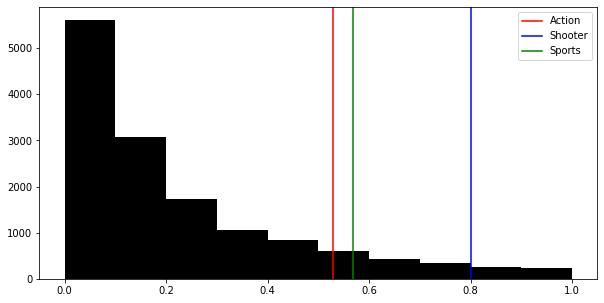

In [ ]:
# 충 출고량이 가장 많은 3개의 장르를 비교
act_mean = at_act['All_Sales'].mean()
sho_mean = at_sho['All_Sales'].mean()
spo_mean = at_spo['All_Sales'].mean()
a = all_data.query('All_Sales < 1')

plt.figure(figsize=(10,5))
plt.hist(a['All_Sales'], color='black')
plt.axvline(act_mean, color='red', label='Action')
plt.axvline(sho_mean, color='blue', label='Shooter')
plt.axvline(spo_mean, color='green', label='Sports')
plt.legend();

### 어떤 시장에서 출시를 해야 수익을 창출할 수 있는가


당사는 Shooter 장르의 게임을 개발할 예정이다.  
  
  Shooter 장르의 게임을 개발할 경우,  
  어느 지역에서 출시를 해야 수익을 창출할 수 있을지 확인이 필요하다

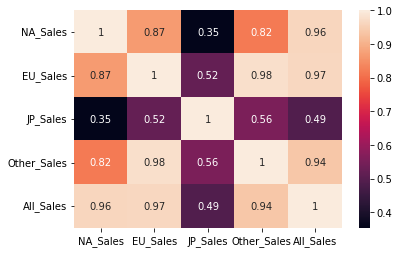

In [ ]:
# Shooter 장르의 출고량에 대한 각 지역간의 상관관계
df_corr_sample = df1[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','All_Sales']]
df_corr = df_corr_sample.query('Genre == "Shooter"')
df_corr = df_corr.corr()
sns.heatmap(df_corr, annot=True);

In [ ]:
# 각 지역별 Shooter 장르의 출고량
asho_sell = df1.query('Genre == "Shooter"')
asho_sell = asho_sell[['EU_Sales','NA_Sales','JP_Sales', 'All_Sales']]

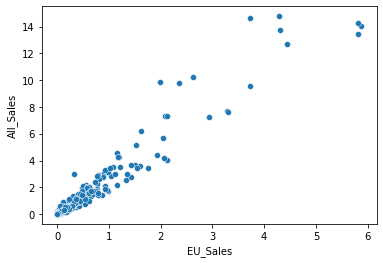

In [ ]:
# sns.set_theme(color_codes=True)
sns.scatterplot(x=asho_sell['EU_Sales'], y=asho_sell['All_Sales']);

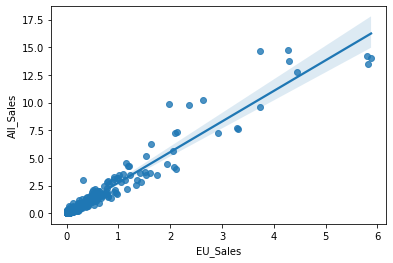

In [ ]:
sns.regplot(x=asho_sell['EU_Sales'], y=asho_sell['All_Sales']);

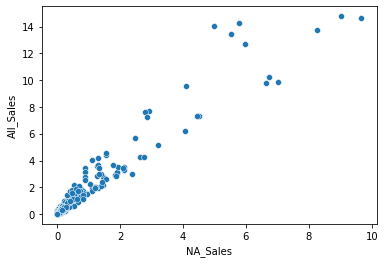

In [ ]:
sns.scatterplot(x=asho_sell['NA_Sales'], y=asho_sell['All_Sales']);

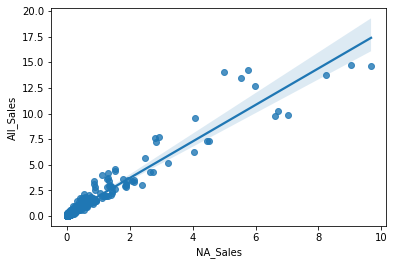

In [ ]:
sns.regplot(x=asho_sell['NA_Sales'], y=asho_sell['All_Sales']);

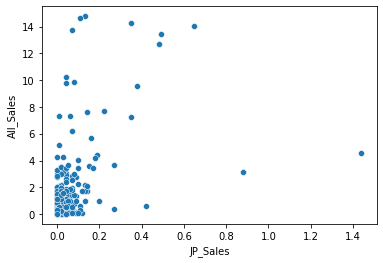

In [ ]:
sns.scatterplot(x=asho_sell['JP_Sales'], y=asho_sell['All_Sales']);

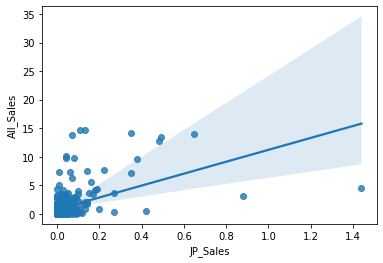

In [ ]:
sns.regplot(x=asho_sell['JP_Sales'], y=asho_sell['All_Sales']);

Shooter 장르를 즐기는 유저들이 선호하는 게임 플랫폼을 확인할 필요가 존재한다. 

In [ ]:
# 각 지역에서 구매한 Shooter 장르의 게임 플랫폼
na_sho_plat = na_sell.query('Genre == "Shooter"')
eu_sho_plat = eu_sell.query('Genre == "Shooter"')
jp_sho_plat = jp_sell.query('Genre == "Shooter"')

na_sho_plat_selling = na_selling.query('Genre == "Shooter"')
eu_sho_plat_selling = eu_selling.query('Genre == "Shooter"')
jp_sho_plat_selling = jp_selling.query('Genre == "Shooter"')

na_sho_plat_zero = na_sell_zero.query('Genre == "Shooter"')
eu_sho_plat_zero = eu_sell_zero.query('Genre == "Shooter"')
jp_sho_plat_zero = jp_sell_zero.query('Genre == "Shooter"')

In [ ]:
# 북미 전체 게임플랫폼
nasho_sell_plat = na_sho_plat.groupby(['Platform'])['NA_Sales'].count().reset_index()
nasho_sell_plat = nasho_sell_plat.rename(columns={'NA_Sales': 'Total_Count'})

# 북미 게임플랫폼 출고 데이터
nasho_local_plat = na_sho_plat_selling.groupby(['Platform'])['NA_Sales'].count().reset_index()
nasho_local_plat_sell = na_sho_plat_selling.groupby(['Platform'])['NA_Sales'].sum().reset_index()
nasho_local_plat_mean = na_sho_plat_selling.groupby(['Platform'])['NA_Sales'].mean().reset_index()
nasho_local_plat = nasho_local_plat.rename(columns={'NA_Sales': 'Sell_Count'})
nasho_local_plat_sell = nasho_local_plat_sell.rename(columns={'NA_Sales': 'Total_Sales'})
nasho_local_plat_mean = nasho_local_plat_mean.rename(columns={'NA_Sales': 'Mean_Sales'})

# 북미 게임플랫폼 미출고 데이터
nasho_local_plat_zero = na_sho_plat_zero.groupby(['Platform'])['NA_Sales'].count().reset_index()
nasho_local_plat_zero = nasho_local_plat_zero.rename(columns={'NA_Sales' : 'NoSell_Count'})

# 북미 데이터
nasho_data_plat = pd.merge(nasho_sell_plat,nasho_local_plat,how='outer', on='Platform')
nasho_data_plat = pd.merge(nasho_data_plat,nasho_local_plat_zero,how='outer', on='Platform')
nasho_data_plat = pd.merge(nasho_data_plat,nasho_local_plat_sell,how='outer', on='Platform')
nasho_data_plat = pd.merge(nasho_data_plat,nasho_local_plat_mean,how='outer', on='Platform')
nasho_data_plat = nasho_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
nasho_data_plat = nasho_data_plat.drop('index', axis=1)
nasho_data_plat['Conversion_Rate'] = nasho_data_plat['Sell_Count']/nasho_data_plat['Total_Count']
nasho_data_plat['Prefer_Rate'] = nasho_data_plat['Mean_Sales'] * nasho_data_plat['Conversion_Rate']
nasho_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,X360,100,87,13.0,42.73,0.491149,0.870000,0.427300
1,PS3,93,86,7.0,31.21,0.362907,0.924731,0.335591
2,PC,71,52,19.0,7.97,0.153269,0.732394,0.112254
3,PS4,33,33,NaN,22.25,0.674242,1.000000,0.674242
4,XOne,31,31,NaN,24.05,0.775806,1.000000,0.775806
5,Wii,19,19,NaN,3.15,0.165789,1.000000,0.165789
6,WiiU,10,8,2.0,2.38,0.297500,0.800000,0.238000
7,DS,7,7,NaN,1.17,0.167143,1.000000,0.167143
8,3DS,6,4,2.0,0.62,0.155000,0.666667,0.103333
9,PSV,5,5,NaN,1.77,0.354000,1.000000,0.354000


In [ ]:
# 유럽 전체 게임플랫폼
eusho_sell_plat = eu_sho_plat.groupby(['Platform'])['EU_Sales'].count().reset_index()
eusho_sell_plat = eusho_sell_plat.rename(columns={'EU_Sales': 'Total_Count'})

# 유럽 게임플랫폼 출고 데이터
eusho_local_plat = eu_sho_plat_selling.groupby(['Platform'])['EU_Sales'].count().reset_index()
eusho_local_plat_sell = eu_sho_plat_selling.groupby(['Platform'])['EU_Sales'].sum().reset_index()
eusho_local_plat_mean = eu_sho_plat_selling.groupby(['Platform'])['EU_Sales'].mean().reset_index()
eusho_local_plat = eusho_local_plat.rename(columns={'EU_Sales': 'Sell_Count'})
eusho_local_plat_sell = eusho_local_plat_sell.rename(columns={'EU_Sales': 'Total_Sales'})
eusho_local_plat_mean = eusho_local_plat_mean.rename(columns={'EU_Sales': 'Mean_Sales'})

# 유럽 게임플랫폼 미출고 데이터
eusho_local_plat_zero = eu_sho_plat_zero.groupby(['Platform'])['EU_Sales'].count().reset_index()
eusho_local_plat_zero = eusho_local_plat_zero.rename(columns={'EU_Sales' : 'NoSell_Count'})

# 유럽 데이터
eusho_data_plat = pd.merge(eusho_sell_plat,eusho_local_plat,how='outer', on='Platform')
eusho_data_plat = pd.merge(eusho_data_plat,eusho_local_plat_zero,how='outer', on='Platform')
eusho_data_plat = pd.merge(eusho_data_plat,eusho_local_plat_sell,how='outer', on='Platform')
eusho_data_plat = pd.merge(eusho_data_plat,eusho_local_plat_mean,how='outer', on='Platform')
eusho_data_plat = eusho_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
eusho_data_plat = eusho_data_plat.drop('index', axis=1)
eusho_data_plat['Conversion_Rate'] = eusho_data_plat['Sell_Count']/eusho_data_plat['Total_Count']
eusho_data_plat['Prefer_Rate'] = eusho_data_plat['Mean_Sales'] * eusho_data_plat['Conversion_Rate']
eusho_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,X360,105,88,17.0,34.97,0.397386,0.838095,0.333048
1,PS3,93,84,9.0,32.32,0.384762,0.903226,0.347527
2,PC,71,64,7.0,13.22,0.206563,0.901408,0.186197
3,XOne,33,31,2.0,15.27,0.492581,0.939394,0.462727
4,PS4,31,27,4.0,20.75,0.768519,0.870968,0.669355
5,Wii,19,10,9.0,1.07,0.107000,0.526316,0.056316
6,WiiU,10,9,1.0,1.71,0.190000,0.900000,0.171000
7,DS,7,5,2.0,0.16,0.032000,0.714286,0.022857
8,3DS,6,2,4.0,0.33,0.165000,0.333333,0.055000
9,PSV,5,5,NaN,1.76,0.352000,1.000000,0.352000


In [ ]:
# 일본 전체 게임플랫폼
jpsho_sell_plat = jp_sho_plat.groupby(['Platform'])['JP_Sales'].count().reset_index()
jpsho_sell_plat = jpsho_sell_plat.rename(columns={'JP_Sales': 'Total_Count'})

# 일본 게임플랫폼 출고 데이터
jpsho_local_plat = jp_sho_plat_selling.groupby(['Platform'])['JP_Sales'].count().reset_index()
jpsho_local_plat_sell = jp_sho_plat_selling.groupby(['Platform'])['JP_Sales'].sum().reset_index()
jpsho_local_plat_mean = jp_sho_plat_selling.groupby(['Platform'])['JP_Sales'].mean().reset_index()
jpsho_local_plat = jpsho_local_plat.rename(columns={'JP_Sales': 'Sell_Count'})
jpsho_local_plat_sell = jpsho_local_plat_sell.rename(columns={'JP_Sales': 'Total_Sales'})
jpsho_local_plat_mean = jpsho_local_plat_mean.rename(columns={'JP_Sales': 'Mean_Sales'})

# 일본 게임플랫폼 미출고 데이터
jpsho_local_plat_zero = jp_sho_plat_zero.groupby(['Platform'])['JP_Sales'].count().reset_index()
jpsho_local_plat_zero = jpsho_local_plat_zero.rename(columns={'JP_Sales' : 'NoSell_Count'})

# 일본 데이터
jpsho_data_plat = pd.merge(jpsho_sell_plat,jpsho_local_plat,how='outer', on='Platform')
jpsho_data_plat = pd.merge(jpsho_data_plat,jpsho_local_plat_zero,how='outer', on='Platform')
jpsho_data_plat = pd.merge(jpsho_data_plat,jpsho_local_plat_sell,how='outer', on='Platform')
jpsho_data_plat = pd.merge(jpsho_data_plat,jpsho_local_plat_mean,how='outer', on='Platform')
jpsho_data_plat = jpsho_data_plat.sort_values(by='Total_Count',ascending=False).reset_index()
jpsho_data_plat = jpsho_data_plat.drop('index', axis=1)
jpsho_data_plat['Conversion_Rate'] = jpsho_data_plat['Sell_Count']/jpsho_data_plat['Total_Count']
jpsho_data_plat['Prefer_Rate'] = jpsho_data_plat['Mean_Sales'] * jpsho_data_plat['Conversion_Rate']
jpsho_data_plat

,Platform,Total_Count,Sell_Count,NoSell_Count,Total_Sales,Mean_Sales,Conversion_Rate,Prefer_Rate
0,X360,108,52.0,56.0,1.64,0.031538,0.481481,0.015185
1,PS3,97,63.0,34.0,7.26,0.115238,0.649485,0.074845
2,PC,71,NaN,71.0,NaN,NaN,NaN,NaN
3,PS4,34,24.0,10.0,2.33,0.097083,0.705882,0.068529
4,XOne,33,8.0,25.0,0.16,0.020000,0.242424,0.004848
5,Wii,19,1.0,18.0,0.01,0.010000,0.052632,0.000526
6,WiiU,10,3.0,7.0,1.52,0.506667,0.300000,0.152000
7,DS,7,NaN,7.0,NaN,NaN,NaN,NaN
8,3DS,6,2.0,4.0,0.20,0.100000,0.333333,0.033333
9,PSV,5,5.0,NaN,0.24,0.048000,1.000000,0.048000


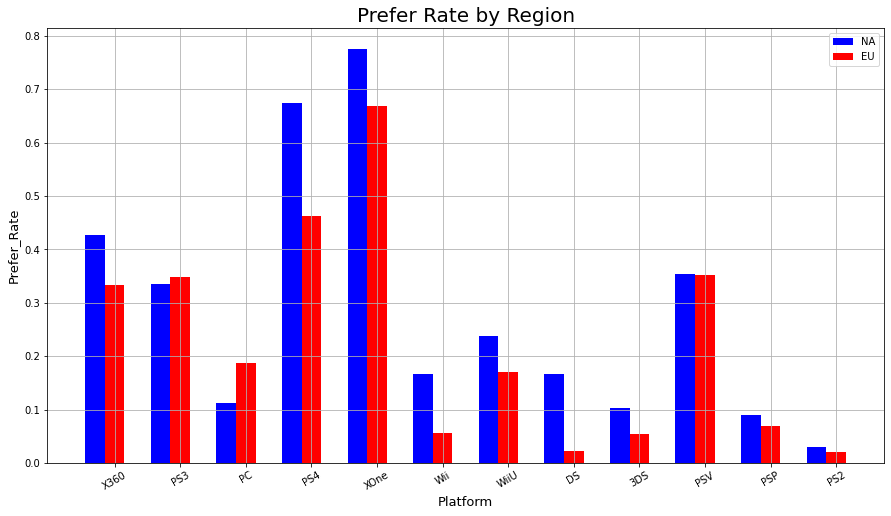

In [ ]:
n = nasho_data_plat.shape[0]
ind = np.arange(n)
w=0.3

plt.figure(figsize=(15,8))
plt.bar(ind-w, nasho_data_plat['Prefer_Rate'], color='blue', width=w, label='NA')
plt.bar(ind, eusho_data_plat['Prefer_Rate'], color='red', width=w, label='EU')
plt.xticks(ind, nasho_data_plat['Platform'], rotation=30)
plt.ylabel('Prefer_Rate', fontsize=13)
plt.xlabel('Platform', fontsize=13)
plt.title('Prefer Rate by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

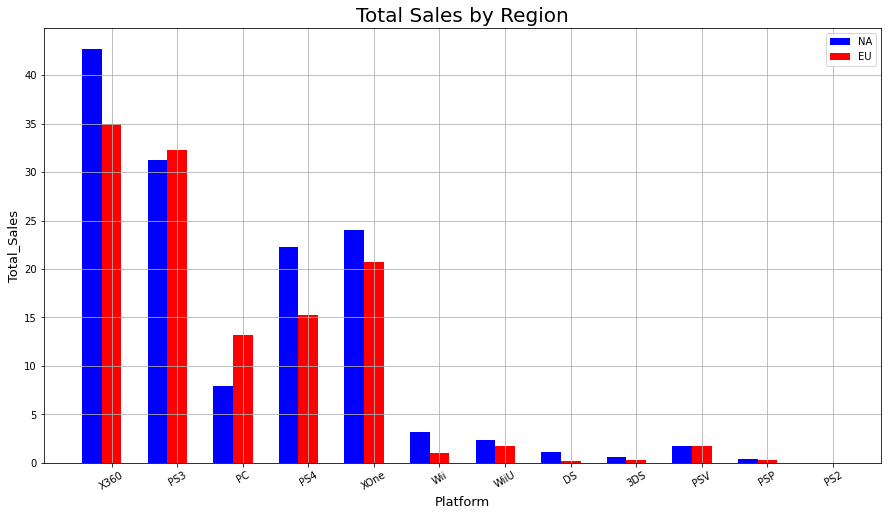

In [ ]:
n = nasho_data_plat.shape[0]
ind = np.arange(n)
w=0.3

plt.figure(figsize=(15,8))
plt.bar(ind-w, nasho_data_plat['Total_Sales'], color='blue', width=w, label='NA')
plt.bar(ind, eusho_data_plat['Total_Sales'], color='red', width=w, label='EU')
plt.xticks(ind, nasho_data_plat['Platform'], rotation=30)
plt.ylabel('Total_Sales', fontsize=13)
plt.xlabel('Platform', fontsize=13)
plt.title('Total Sales by Region', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 플랫폼 결정을 위한 PCA
nap1 = nasho_data_plat[['Total_Sales', 'Mean_Sales','Conversion_Rate', 'Prefer_Rate']]
nap1 = scaler.fit_transform(nap1)
nap1 = pca.fit(nap1)
pca.explained_variance_ratio_

array([6.94669923e-01, 2.14563634e-01, 9.04910188e-02, 2.75424239e-04])

In [ ]:
eup1 = eusho_data_plat[['Total_Sales', 'Mean_Sales','Conversion_Rate', 'Prefer_Rate']]
eup1 = scaler.fit_transform(eup1)
eup1 = pca.fit(eup1)
pca.explained_variance_ratio_

array([6.94916160e-01, 1.96182424e-01, 1.08433459e-01, 4.67957464e-04])